## Importing the libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing the dataset

In [4]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[: , -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ML Model Pipeline

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))
model_pipeline.append(SVC(kernel = 'linear'))
model_pipeline.append(SVC(kernel = 'rbf'))
model_pipeline.append(GaussianNB())
model_pipeline.append(DecisionTreeClassifier(criterion = 'entropy'))
model_pipeline.append(RandomForestClassifier(n_estimators = 100, criterion = 'entropy'))

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
model_list = ('Logistic Regression', 'K-Nearest Neighbors (K-NN)', 'Support Vector Machine(SVM)', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest')

acc_list = []
cm_list = []
for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))
    cm_list.append(confusion_matrix(y_test, y_pred))

## Plot confusion matrix

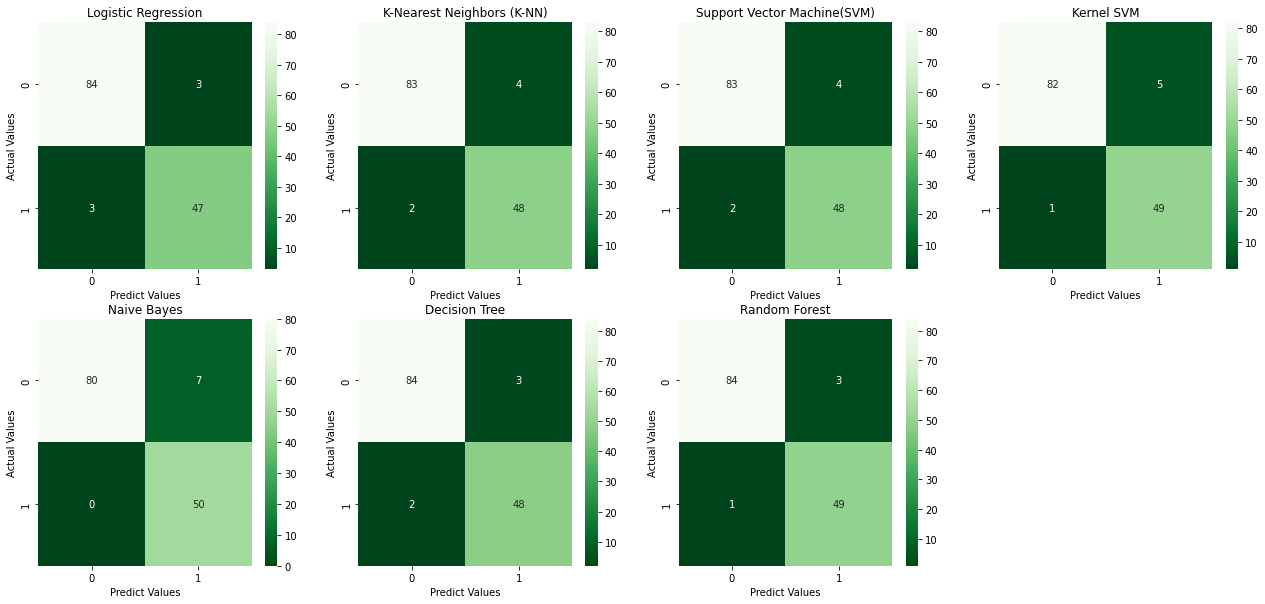

In [62]:
fig = plt.figure(figsize = (22, 10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 4, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot = True, cmap = 'Greens_r')
    cm_plot.set_xlabel('Predict Values')
    cm_plot.set_ylabel('Actual Values')

In [33]:
result_dataset = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list})
result_dataset

,Model,Accuracy
0,Logistic Regression,0.956204
1,K-Nearest Neighbors (K-NN),0.956204
2,Support Vector Machine(SVM),0.956204
3,Kernel SVM,0.956204
4,Naive Bayes,0.948905
5,Decision Tree,0.963504
6,Random Forest,0.970803
